<span style="color:blue"></span>**Carlo**</span>

Here I include some exercises about ANOVA and Chi-Square, that may be included as student's exercises in the course notebooks.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

## One-way ANOVA
Twenty-two patients undergoing cardiac bypass surgery were randomized to one of three ventilation groups:*    
  - *Group I*: Patients received 50% nitrous oxide and 50% oxygen mixture continuously for 24 h.
  - *Group II*: Patients received a 50% nitrous oxide and 50% oxygen mixture only dirng the operation.
  - *Group III*: Patients received no nitrous oxide but received 35-50% oxygen for 24 h.
    
The data show red cell folate levels (X) for the three groups after 24h' ventilation.

In [18]:
data = np.array([[243.0, 1],[251.0, 1],[275.0, 1],[291.0, 1],[347.0, 1],
    [354.0, 1],[380.0, 1],[392.0, 1],[206.0, 2],[210.0, 2],[226.0, 2],
    [249.0, 2],[255.0, 2],[273.0, 2],[285.0, 2],[295.0, 2],[309.0, 2],
    [241.0, 3],[258.0, 3],[270.0, 3], [293.0, 3],[328.0, 3]])

In [30]:
data = pd.DataFrame(data, columns=['x','group'])
data.head(3)

,x,group
0,243.0,1.0
1,251.0,1.0
2,275.0,1.0


In [31]:
data.groupby('group').count()

,x
group,
1.0,8
2.0,9
3.0,5


In [27]:
# Sort them into groups, according to column 1
group1 = data[data.group==1]
group2 = data[data.group==2]
group3 = data[data.group==3]

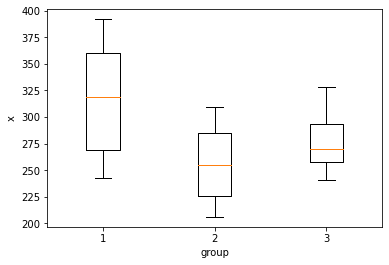

In [43]:
plt.boxplot([group1.x, group2.x, group3.x])
plt.xlabel('group')
plt.ylabel('x')
plt.show()

Performing one-way ANOVA.

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

In [49]:
F_statistic, p = stats.f_oneway(group1.x, group2.x, group3.x)
p

0.043589334959178244

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

If these assumptions are not true for a given set of data, it may still be possible to use the Kruskal-Wallis H-testwhich tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA.

In [51]:
_, p = stats.kruskal(group1.x, group2.x, group3.x)
p

0.12336326887166982

# Two-way ANOVA

In [44]:
inFile = 'altman_12_6.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Bring them in dataframe-format
df = pd.DataFrame(data, columns=['hs', 'fetus', 'observer'])

In [47]:
df

,hs,fetus,observer
0,14.3,1.0,1.0
1,14.0,1.0,1.0
2,14.8,1.0,1.0
3,13.6,1.0,2.0
4,13.6,1.0,2.0
5,13.8,1.0,2.0
6,13.9,1.0,3.0
7,13.7,1.0,3.0
8,13.8,1.0,3.0
9,13.8,1.0,4.0


In [52]:
formula = 'hs ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = ols(formula, df).fit()
print(anova_lm(lm))

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN


# chi squared

When considering categorical variables that may be interdependent. A chi-square test for independence might be used to assess the association between categorical variables.

Assume there are two variables: gender and degree course and need to check whether gender depends on the course or course depends on gender. Then, using the chi-square formula of observed and predicted values, compare the frequency with which male and female employees choose from the available courses.

If there is no relationship between gender and course, implying that they are independent of one another, then the actual frequencies at which both genders choose each offered course should be expected to be approximately equal. The ratio of the gender of students in any selected degree should be approximately equal to the ratio of the gender in the sample.



In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/ahmedbesbes/mlflow/main/data/aug_test.csv')

In [57]:
df.shape

(2129, 13)

In [62]:
ct_table_ind=pd.crosstab(df["education_level"],df["major_discipline"])
ct_table_ind

major_discipline,Arts,Business Degree,Humanities,No Major,Other,STEM
education_level,,,,,,
Graduate,15,23,52,20,34,1124
Masters,1,12,23,2,6,451
Phd,1,2,5,0,0,46


Checking the dependency between the education level of employees and their graduation degree.  So the contingency table is made for them and it looks like the above image.

Now this table is an input in the chi-square function offered by spicy. This function will calculate the test statistics value, p-value, degrees of freedom and expected values.



In [68]:
chi2_stat, p, dof, expected = stats.chi2_contingency(ct_table_ind)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")

chi2 statistic:     18.576
p-value:            0.045994
degrees of freedom: 10


The critical value for the chi-square test with a degree of freedom of 10 and alpha 0.05 is 18.307. Since the test statistic (18.576) exceeds the critical value the null hypothesis is rejected. Therefore, the education level and the graduation degree are dependent on each other.

In [69]:
print("expected frequencies:")
pd.DataFrame(expected,columns=ct_table_ind.columns, index=ct_table_ind.index)

expected frequencies:


major_discipline,Arts,Business Degree,Humanities,No Major,Other,STEM
education_level,,,,,,
Graduate,11.863511,25.820583,55.828288,15.352779,27.914144,1131.220693
Masters,4.631260,10.079802,21.794166,5.993396,10.897083,441.604293
Phd,0.505228,1.099615,2.377545,0.653825,1.188773,48.175014


In [74]:
ct = pd.DataFrame([[106,24,1],[67,85,1],[37,72,3]],
    index=['shift1','shift2','shift3'],
    columns=['Perfect','Satisfactory','Defective'])
ct

,Perfect,Satisfactory,Defective
shift1,106,24,1
shift2,67,85,1
shift3,37,72,3


In [75]:
stats.chi2_contingency(ct)

(65.80293762775237,
 1.7429790314862357e-13,
 4,
 array([[69.46969697, 59.87626263,  1.6540404 ],
        [81.13636364, 69.93181818,  1.93181818],
        [59.39393939, 51.19191919,  1.41414141]]))

## Comparing expected and observed frequencies 
An example with dice throws

In [145]:
# A dice is thrown 120 times
chi_2_statistic, p_value = stats.chisquare(
    f_obs=[15,29,14,18,20,24],f_exp=[20,20,20,20,20,20]
)
print(chi_2_statistic, p_value)

8.1 0.15080986287012518


Let's evaluate $X^2$, a reasonable metric of the total discrepacy between the observed data and the model, i.e. the expected data:

$$\begin{aligned}
& \text {Comparing observed and expected frequencies for the dice experiment }\\
&\begin{array}{ccccc}
\hline \hline \text { Score } &  O_i  &  E_i & (O_i-E_i) & (O_i-E_i)^2/E_i \\
\hline 
1 &15 &20 &-5 &1.25 \\
2 &29 &20 &9 &4.05 \\
3 &14 &20 &-6 &1.8 \\
4 &18 &20 &-2 &0.2 \\
5 &20 &20 &0 & 0\\
6 &24 &20 &4 &0.8 \\
\hline
\text{Total}& 120&120&0& X^2=8.1\\
\hline
\end{array}
\end{aligned}$$

$X^2$ gives a measure of the **goodness of fit** of the model, that is how well the theoretical and observed frequencies agree. For perfect agreement it takes the value of zero. The larger the discrepacy, the larger $X^2$. 

If you repeated the experiment, you would obtain a new set of $O_i$, thus a new $X^2$. In other words, $X^2$ itself **is a random variable**. In order to determine whether a value of 8.1 indicates a significant difference between the model and the data, we need to study the probability distribution of the r.v. $X^2$.

It can be shown that $X^2$ is approximately distributed according to a new family of distributions, namely the **chi-squared $\chi^2$** family of distributions.

In [153]:
values = [1, 2, 3, 4, 5, 6]

sample_size = 120
n_samples = 10000
chi_sq_list = []
for i_sample in range(n_samples):
    sample = np.random.choice(values, size=sample_size)
    _val, _counts = np.unique(sample, return_counts=True)

    obs_freq_dict = {_val[i]:_counts[i] for i in range(len(values))}
    exp_freq = np.ones(6)*sample_size/6

    obs_freq=[]
    for i in values:
        obs_freq.append(obs_freq_dict[i])
    obs_freq=np.array(obs_freq)    

    chi_sq = (np.square(obs_freq-exp_freq)/exp_freq).sum()
    chi_sq_list.append(chi_sq)

The X statistic is distributed according to the $\chi^2_\nu$ statistic.
The number $\nu$ of degrees of freedom is equal to the number of classes (6) minus the number of constraints (1 in this case, that is the sum of the frequencies is equal to `sample_size`). 

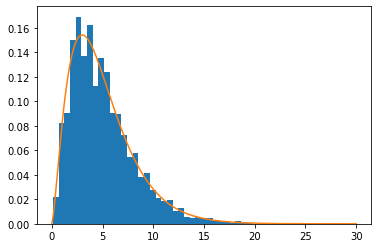

In [154]:
x_values = np.linspace(0,30,200)
plt.hist(chi_sq_list, bins=40, density=True)
plt.plot(x_values, stats.chi2(df=5).pdf(x_values))
plt.show()

In [155]:
simulation_p_value = (chi_sq_list>chi_2_statistic).sum()/len(chi_sq_list) 
print(f'simulation p_value = {simulation_p_value}, calculated p_value={p_value} ')

simulation p_value = 0.1508, calculated p_value=0.15080986287012518 
